In [1]:
import pandas as pd
data = pd.read_csv('globalterrorismdb_shorter.csv')
data.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS


In [243]:
subdata = data[["iyear", "country_txt", "latitude", "longitude", "attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "targsubtype1_txt", "gname"]]
subdata.head(10)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
0,1970,Dominican Republic,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Dominican Republic,Named Civilian,MANO-D
1,1970,Mexico,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League
2,1970,Philippines,15.478598,120.599741,Assassination,Journalists & Media,Unknown,United States,Radio Journalist/Staff/Facility,Unknown
3,1970,Greece,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Unknown
4,1970,Japan,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,United States,Embassy/Consulate,Unknown
5,1970,United States,37.005105,-89.176269,Armed Assault,Police,Firearms,United States,"Police Building (headquarters, station, school)",Black Nationalists
6,1970,Uruguay,-34.891151,-56.187214,Assassination,Police,Firearms,Uruguay,Police Security Forces/Officers,Tupamaros (Uruguay)
7,1970,United States,37.805065,-122.273024,Bombing/Explosion,Utilities,Explosives/Bombs/Dynamite,United States,Electricity,Unknown
8,1970,United States,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Incendiary,United States,Military Recruiting Station/Academy,New Year's Gang
9,1970,United States,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Incendiary,United States,Government Building/Facility/Office,New Year's Gang


In [244]:
subdata = subdata.dropna(axis=0, how='any')
subdata.head(10)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
0,1970,Dominican Republic,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Dominican Republic,Named Civilian,MANO-D
1,1970,Mexico,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League
2,1970,Philippines,15.478598,120.599741,Assassination,Journalists & Media,Unknown,United States,Radio Journalist/Staff/Facility,Unknown
3,1970,Greece,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),Explosives/Bombs/Dynamite,United States,Embassy/Consulate,Unknown
4,1970,Japan,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,United States,Embassy/Consulate,Unknown
5,1970,United States,37.005105,-89.176269,Armed Assault,Police,Firearms,United States,"Police Building (headquarters, station, school)",Black Nationalists
6,1970,Uruguay,-34.891151,-56.187214,Assassination,Police,Firearms,Uruguay,Police Security Forces/Officers,Tupamaros (Uruguay)
7,1970,United States,37.805065,-122.273024,Bombing/Explosion,Utilities,Explosives/Bombs/Dynamite,United States,Electricity,Unknown
8,1970,United States,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Incendiary,United States,Military Recruiting Station/Academy,New Year's Gang
9,1970,United States,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Incendiary,United States,Government Building/Facility/Office,New Year's Gang


In [245]:
cleaned_data = subdata[(subdata["country_txt"]=="Philippines") & (subdata["attacktype1_txt"]!="Unknown") 
                       & (subdata["weaptype1_txt"]!="Unknown") & (subdata["gname"]!="Unknown") 
                       & ((subdata["iyear"]>=1995) & (subdata["iyear"]<=2016))]

cleaned_data.head(15)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,targsubtype1_txt,gname
58237,1995,Philippines,6.548095,121.873617,Hostage Taking (Kidnapping),Private Citizens & Property,Melee,Philippines,Named Civilian,Abu Sayyaf Group (ASG)
58348,1995,Philippines,8.004674,124.291300,Hostage Taking (Kidnapping),Educational Institution,Firearms,Philippines,School/University/Educational Building,Muslims
58482,1995,Philippines,6.908868,122.077200,Hostage Taking (Kidnapping),Business,Firearms,Philippines,Retail/Grocery/Bakery,Abu Sayyaf Group (ASG)
58792,1995,Philippines,14.596051,120.978666,Bombing/Explosion,Airports & Aircraft,Explosives/Bombs/Dynamite,Singapore,Airline Officer/Personnel,Alex Boncayao Brigade (ABB)
58793,1995,Philippines,14.596051,120.978666,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Philippines,Government Building/Facility/Office,Alex Boncayao Brigade (ABB)
58858,1995,Philippines,7.784030,122.593085,Hostage Taking (Barricade Incident),Private Citizens & Property,Explosives/Bombs/Dynamite,Philippines,Village/City/Town/Suburb,Abu Sayyaf Group (ASG)
59044,1995,Philippines,6.867291,124.443559,Bombing/Explosion,Private Citizens & Property,Explosives/Bombs/Dynamite,Philippines,Village/City/Town/Suburb,Muslim Guerrillas
59045,1995,Philippines,6.052979,121.002479,Armed Assault,Military,Firearms,Philippines,"Military Personnel (soldiers, troops, officers...",Tulawie Clan
59321,1995,Philippines,6.052979,121.002479,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Philippines,Politician or Political Party Movement/Meeting...,Supporters of opposing candidate Abdu Sakurtan
59453,1995,Philippines,6.118078,125.172684,Armed Assault,Transportation,Incendiary,Philippines,Bus (excluding tourists),New People's Army (NPA)


In [145]:
listOfGroups = cleaned_data["gname"].value_counts()
listOfGroups[:20]

New People's Army (NPA)                        1323
Abu Sayyaf Group (ASG)                          412
Bangsamoro Islamic Freedom Movement (BIFM)      310
Moro Islamic Liberation Front (MILF)            303
Moro National Liberation Front (MNLF)            23
Jemaah Islamiya (JI)                             18
Maute Group                                      15
Al-Khobar                                        10
Alex Boncayao Brigade (ABB)                      10
Islamic State of Iraq and the Levant (ISIL)       8
Muslim extremists                                 5
Gunmen                                            4
Communists                                        3
Muslim Guerrillas                                 3
Kilafah Islamic Movement                          3
Ansar Al-Khilafa (Philippines)                    3
Moro Ghuraba                                      2
Filipino Soldiers for the Country                 2
National Democratic Front-Bicol (NDF-Bicol)       2
Muslims     

In [146]:
listOfAttacks = cleaned_data["attacktype1_txt"].value_counts()
listOfAttacks

Armed Assault                          973
Bombing/Explosion                      856
Facility/Infrastructure Attack         264
Hostage Taking (Kidnapping)            254
Assassination                          105
Hostage Taking (Barricade Incident)     20
Hijacking                               15
Unarmed Assault                          1
Name: attacktype1_txt, dtype: int64

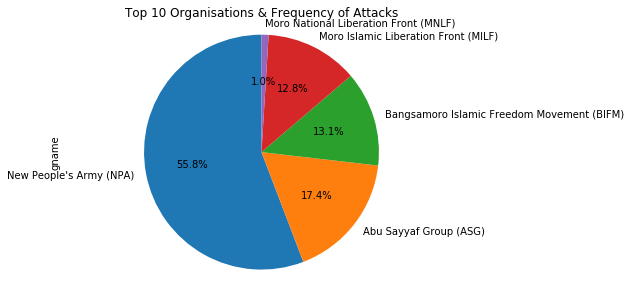

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

listOfGroups = listOfGroups[:5]
#listOfGroups



listOfGroups.plot.pie(x="y".index,
               shadow=False,   # exploding 'Friday'
               startangle=90,
               autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()

plt.title("Top 10 Organisations & Frequency of Attacks")
plt.show()

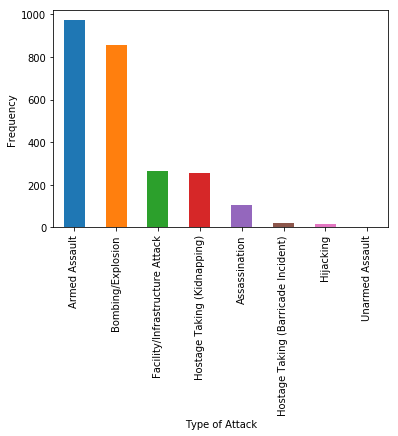

In [148]:
listOfAttacks.plot.bar()
plt.ylabel("Frequency")
plt.xlabel("Type of Attack")
plt.show()

In [149]:
listOfYears = cleaned_data["iyear"].value_counts()
listOfYears = listOfYears.sort_index()
listOfYears

1995     23
1996     18
1997     14
1998     11
1999     26
2000    111
2001     38
2002     40
2003     86
2004     22
2005     19
2006     28
2007     30
2008    147
2009    104
2010     73
2011     68
2012    136
2013    303
2014    402
2015    495
2016    294
Name: iyear, dtype: int64

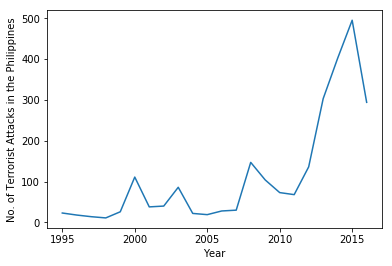

In [150]:
listOfYears.plot()
plt.ylabel("No. of Terrorist Attacks in the Philippines")
plt.xlabel("Year")
plt.show()

In [152]:
locationsData = cleaned_data[["latitude", "longitude"]]
locationsData.head(10)

,latitude,longitude
58237,6.548095,121.873617
58348,8.004674,124.291300
58399,7.518802,122.369702
58482,6.908868,122.077200
58792,14.596051,120.978666
58793,14.596051,120.978666
58858,7.784030,122.593085
59044,6.867291,124.443559
59045,6.052979,121.002479
59321,6.052979,121.002479


In [40]:
from mpl_toolkits.basemap import Basemap

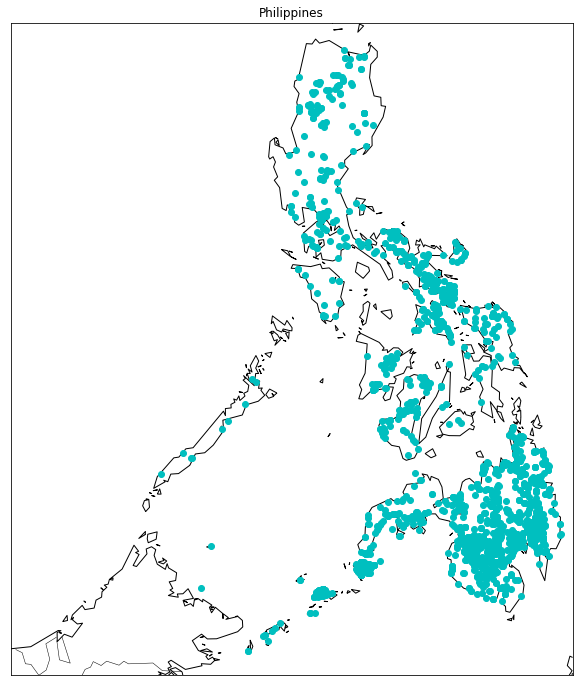

In [153]:
m = Basemap(projection='lcc', lat_0 = 11, lon_0 = 123,
    resolution = 'l', area_thresh = 0.05,
    llcrnrlon=114, llcrnrlat=4,
    urcrnrlon=127, urcrnrlat=19)



plt.figure(figsize=(24,12))

m.drawcoastlines()
m.drawcountries()

for index, row in locationsData.iterrows():
    PLPNSlat, PLPNSlon = row["latitude"], row["longitude"]
    xpt, ypt = m(PLPNSlon, PLPNSlat)
    m.plot(xpt, ypt, "co")

plt.title('Philippines')

plt.show()

In [5]:
cleaned_data.head(15)

,iyear,country_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,gname
58237,1995,Philippines,6.548095,121.873617,Hostage Taking (Kidnapping),Private Citizens & Property,Melee,Abu Sayyaf Group (ASG)
58348,1995,Philippines,8.004674,124.291300,Hostage Taking (Kidnapping),Educational Institution,Firearms,Muslims
58399,1995,Philippines,7.518802,122.369702,Hostage Taking (Kidnapping),Business,Firearms,Moro National Liberation Front (MNLF)
58482,1995,Philippines,6.908868,122.077200,Hostage Taking (Kidnapping),Business,Firearms,Abu Sayyaf Group (ASG)
58792,1995,Philippines,14.596051,120.978666,Bombing/Explosion,Airports & Aircraft,Explosives/Bombs/Dynamite,Alex Boncayao Brigade (ABB)
58793,1995,Philippines,14.596051,120.978666,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Alex Boncayao Brigade (ABB)
58858,1995,Philippines,7.784030,122.593085,Hostage Taking (Barricade Incident),Private Citizens & Property,Explosives/Bombs/Dynamite,Abu Sayyaf Group (ASG)
59044,1995,Philippines,6.867291,124.443559,Bombing/Explosion,Private Citizens & Property,Explosives/Bombs/Dynamite,Muslim Guerrillas
59045,1995,Philippines,6.052979,121.002479,Armed Assault,Military,Firearms,Tulawie Clan
59321,1995,Philippines,6.052979,121.002479,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Supporters of opposing candidate Abdu Sakurtan


In [176]:
##pre-processing
#df = data[["iyear", "country_txt", "attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "gname"]]



cleaned_data = cleaned_data[["attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "gname"]]

cleaned_data.head(10)

,attacktype1_txt,targtype1_txt,weaptype1_txt,natlty1_txt,gname
58237,Hostage Taking (Kidnapping),Private Citizens & Property,Melee,Philippines,Abu Sayyaf Group (ASG)
58348,Hostage Taking (Kidnapping),Educational Institution,Firearms,Philippines,Muslims
58399,Hostage Taking (Kidnapping),Business,Firearms,Philippines,Moro National Liberation Front (MNLF)
58482,Hostage Taking (Kidnapping),Business,Firearms,Philippines,Abu Sayyaf Group (ASG)
58792,Bombing/Explosion,Airports & Aircraft,Explosives/Bombs/Dynamite,Singapore,Alex Boncayao Brigade (ABB)
58793,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Philippines,Alex Boncayao Brigade (ABB)
58858,Hostage Taking (Barricade Incident),Private Citizens & Property,Explosives/Bombs/Dynamite,Philippines,Abu Sayyaf Group (ASG)
59044,Bombing/Explosion,Private Citizens & Property,Explosives/Bombs/Dynamite,Philippines,Muslim Guerrillas
59045,Armed Assault,Military,Firearms,Philippines,Tulawie Clan
59321,Bombing/Explosion,Government (General),Explosives/Bombs/Dynamite,Philippines,Supporters of opposing candidate Abdu Sakurtan


In [177]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
cleaned_data['weaptype1_txt'].unique()

array(['Melee', 'Firearms', 'Explosives/Bombs/Dynamite', 'Incendiary'], dtype=object)

In [179]:
class_group = cleaned_data.groupby('weaptype1_txt').apply(lambda x: len(x))
class_group

weaptype1_txt
Explosives/Bombs/Dynamite     943
Firearms                     1290
Incendiary                    219
Melee                          23
dtype: int64

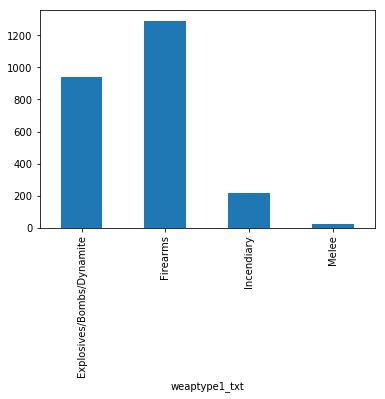

In [180]:
class_group.plot(kind='bar', grid=False)

## Decision Tree Classifier

Columns which are deemed most valuable are selected. As all data is categorical, it must be vectorised before it is passed into the Decision Tree.

In [438]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ["attacktype1_txt", "targtype1_txt", "weaptype1_txt", "natlty1_txt", "targsubtype1_txt"]

X_feature = cleaned_data[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

# print the features
vect.get_feature_names()



['attacktype1_txt=Armed Assault',
 'attacktype1_txt=Assassination',
 'attacktype1_txt=Bombing/Explosion',
 'attacktype1_txt=Facility/Infrastructure Attack',
 'attacktype1_txt=Hijacking',
 'attacktype1_txt=Hostage Taking (Barricade Incident)',
 'attacktype1_txt=Hostage Taking (Kidnapping)',
 'attacktype1_txt=Unarmed Assault',
 'natlty1_txt=Australia',
 'natlty1_txt=Belgium',
 'natlty1_txt=Canada',
 'natlty1_txt=China',
 'natlty1_txt=Germany',
 'natlty1_txt=Indonesia',
 'natlty1_txt=International',
 'natlty1_txt=Ireland',
 'natlty1_txt=Italy',
 'natlty1_txt=Japan',
 'natlty1_txt=Malaysia',
 'natlty1_txt=Multinational',
 'natlty1_txt=Netherlands',
 'natlty1_txt=Norway',
 'natlty1_txt=Pakistan',
 'natlty1_txt=Philippines',
 'natlty1_txt=Singapore',
 'natlty1_txt=South Korea',
 'natlty1_txt=Sri Lanka',
 'natlty1_txt=Sweden',
 'natlty1_txt=Taiwan',
 'natlty1_txt=United States',
 'natlty1_txt=Vietnam',
 'targsubtype1_txt=Affiliated Institution',
 'targsubtype1_txt=Aircraft (not at an airport)

In [439]:
import random

random.shuffle(X_vector)

##the array is shuffled then split into two groups. 70% of array for training and 30% for testing
X_Train = X_vector[0:1622]
X_Test = X_vector[1622:2317] 

In [440]:
len(X_vector)

2317

In [441]:
len(X_Train)

1622

In [442]:
len(X_Test)

695

In [452]:
(len(X_Train)/2317)*100 # Training data as a percentage of the overall array

70.00431592576608

In [444]:
(len(X_Test)/2317)*100 # Testing data as a percentage of the overall array

29.995684074233925

In [445]:
le = LabelEncoder()
y_train = le.fit_transform(cleaned_data['gname'][0:1622])

In [446]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [447]:
le.inverse_transform(clf.predict(X_Test))

array(["New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       'Bangsamoro Islamic Freedom Movement (BIFM)',
       "New People's Army (NPA)", "New People's Army (NPA)",
       'Abu Sayyaf Group (ASG)', "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", "New People's Army (NPA)",
       "New People's Army (NPA)", 'Moro Islamic Liberation Front (MILF)',
       "New People's Army (NPA)", "New People's Army (NPA)",
       'Abu Sayyaf Group (ASG)', "New People's Army (NPA)",
       "New People's 

In [448]:
Train_predict = clf.predict(X_Train)

In [449]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_train, Train_predict))
print(classification_report(y_train, Train_predict))

Accuracy is: 0.553637484587
             precision    recall  f1-score   support

          0       0.50      0.25      0.33       257
          1       0.00      0.00      0.00         8
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         1
          5       0.48      0.17      0.25       167
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         3
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.50      0.06      0.11        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         2
         17      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Results of Decision Tree
The results of the Decision Tree show that given the columns: 
**attacktype1_txt , targtype1_txt, weaptype1_txt, natlty1_txt, targsubtype1_txt** 
then the **gname** can be determined to an accuracy of 55%, which is not a strong enough 
result to use as a definitive predictor of the terrorist group. 

## Random Forest 

In [454]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold # Add important libs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [467]:
parameter_gridsearch = {
                 'max_depth' : [1, 2], 
                 'n_estimators': [50, 20], 
                 'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2],      
                 'min_samples_leaf': [1, 3, 4],
                 'bootstrap': [True, False],
                 }

In [468]:
randomforest = RandomForestClassifier()
crossvalidation = StratifiedKFold(X_Train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(randomforest, scoring='accuracy', param_grid=parameter_gridsearch, cv=crossvalidation)

gridsearch.fit(X_Train[0::,1::], X_Train[0::,0])    #train[0::,0] is as target
model = gridsearch
parameters = gridsearch.best_params_

In [469]:
print('Best Score: {}'.format(gridsearch.best_score_))

Best Score: 0.8378545006165228
